In [1]:
import os
import torch
from torch.autograd import Variable
import torch.nn as nn
from net import vgg16_bn
from resnet_yolo import resnet50
import torchvision.transforms as transforms
import cv2
import numpy as np
from util_pred import *
import cv2
import matplotlib.pyplot as plt
import time

C:\Users\lgses\OneDrive\文档\GitHub\Object_Detector\yolo\util_pred.py:143: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(img[None, :, :, :], volatile=True)
C:\Users\lgses\Anaconda3\lib\site-packages\torch\nn\functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Elapsed time: 0.925525
Elapsed time: 0.045857
Elapsed time: 0.041889
Elapsed time: 0.041888
Elapsed time: 0.042886


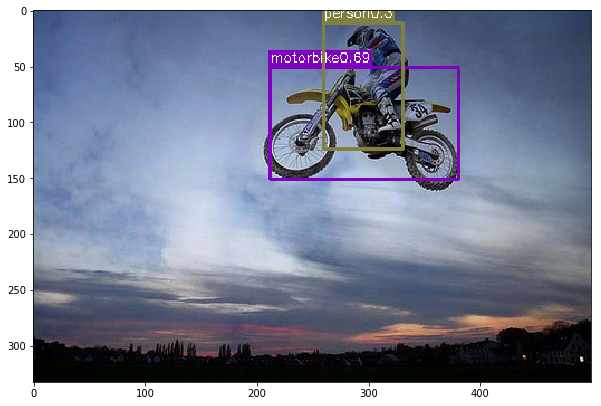

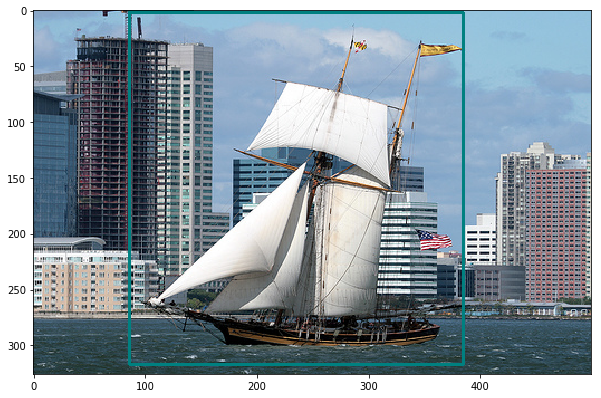

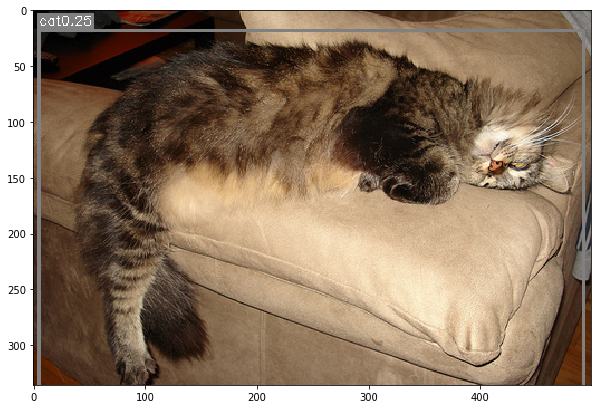

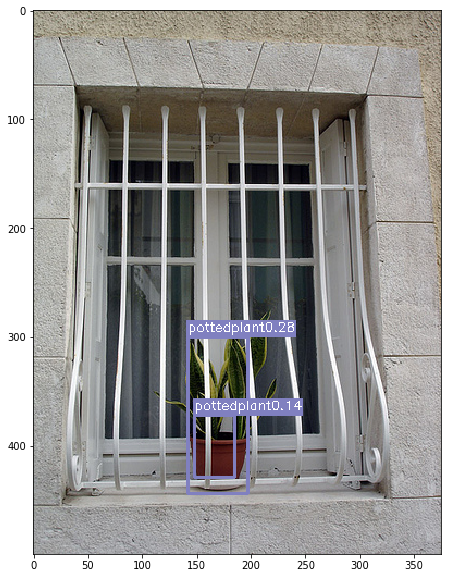

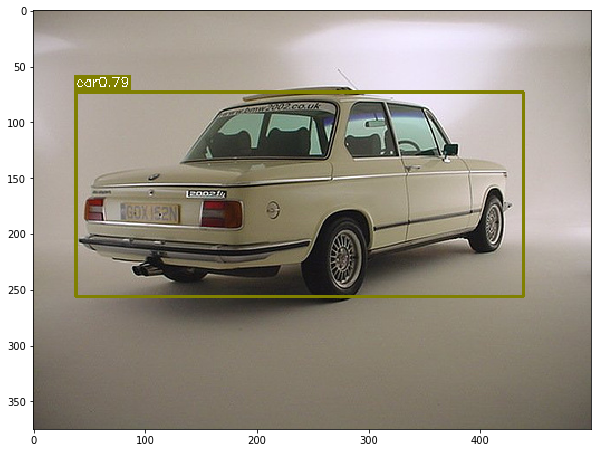

In [2]:
num_fig = 5  # Show some figures of model prediction
# Randomly select images from validation set to predict
rand_idx = np.sort(np.random.randint(0, 5822, size=num_fig)).tolist()
root = './data/JPEGImages/'

model = resnet50()
model.load_state_dict(torch.load('bestresnet50.pth'))                  # thre=0.25, conf=0.12
# model = vgg16_bn()
# model.load_state_dict(torch.load('bestvgg16.pth'))                   # thre=0.5, conf=0.01
model.eval()
model.cuda()

# Start prediction
f = open('voc2012val.txt')
lines = f.readlines()
for i in range(num_fig):
    image_name = lines[rand_idx[i]].strip().split()[0]
    ts = time.time()
    image = cv2.imread(os.path.join(root,image_name))
    result = predict_gpu(model, image_name, threshold=0.3, confidence=0.1, root_path=root)
    for left_up,right_bottom,class_name,_,prob in result:
        color = Color[VOC_CLASSES.index(class_name)]
        cv2.rectangle(image,left_up,right_bottom,color,2)
        label = class_name+str(round(prob,2))
        text_size, baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)
        p1 = (left_up[0], left_up[1]- text_size[1])
        cv2.rectangle(image, (p1[0] - 2//2, p1[1] - 2 - baseline), (p1[0] + text_size[0], p1[1] + text_size[1]), color, -1)
        cv2.putText(image, label, (p1[0], p1[1] + baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1, 8)
    print('Elapsed time: %.6f' % (time.time()-ts))
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
f.close()